In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_columns=50

import sklearn
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:\\Users\\JuhoSon\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding-Bold.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

# Data Load

In [4]:
df_20 = pd.read_csv('./data/innovation/create/df_age40.csv')

In [5]:
df_20.shape

(365, 38)

In [6]:
df_20.head()

,age40숙박,age40레저용품,age40레저업소,age40문화취미,age40가구,age40전기,age40주방,age40연료,age40광학,age40가전,age40유통업,age40의복,age40직물,age40신변잡화,age40서적문구,age40사무통신,age40자동차판매,age40자동차정비,age40의료기관,age40보건위생,age40요식업소,age40음료식품,age40수리서비스,age40,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,pm10,pm25,CONTENT,temp,humi,강수량(mm)
0,74.0,508.0,1155.0,733.0,NaN,NaN,NaN,1851.0,12.0,90.0,43393.0,608.0,NaN,156.0,2473.0,29.0,NaN,143.0,1846.0,2935.0,22259.0,4292.0,145.0,326534.25,5.775959e+06,4.653959e+06,7.123695e+06,460575.529718,8.889679e+05,102938.908335,158304.695151,125768.139866,68.127083,35.221528,515,16.580764,56.770833,0.0
1,47.0,164.0,580.0,226.0,NaN,NaN,NaN,1567.0,87.0,185.0,35439.0,510.0,8.0,89.0,2063.0,NaN,NaN,226.0,10584.0,1507.0,18013.0,5175.0,632.0,374955.29,5.798567e+06,4.068040e+06,6.922594e+06,517274.801816,7.320147e+05,85751.772442,189721.667844,159773.285544,71.924306,29.909028,888,19.631111,57.827083,0.0
2,39.0,122.0,758.0,213.0,20.0,NaN,NaN,1496.0,55.0,78.0,36553.0,457.0,12.0,116.0,1814.0,16.0,12.0,219.0,8320.0,1578.0,18875.0,4937.0,405.0,391194.83,5.882238e+06,4.045719e+06,6.679634e+06,396954.848039,6.941187e+05,109181.181977,146743.364491,83460.961960,72.979861,24.331944,856,19.192500,61.674306,0.1
3,39.0,178.0,777.0,213.0,17.0,NaN,21.0,1598.0,81.0,123.0,46101.0,437.0,20.0,144.0,1848.0,34.0,NaN,200.0,7963.0,1615.0,19880.0,5217.0,620.0,388102.91,6.163598e+06,4.284199e+06,6.238373e+06,400734.630537,9.144325e+05,106260.195832,133827.487702,85526.543799,18.221528,10.952778,893,14.075417,60.129861,18.5
4,100.0,142.0,728.0,295.0,30.0,NaN,NaN,1545.0,38.0,67.0,32439.0,322.0,8.0,58.0,1313.0,20.0,NaN,148.0,7195.0,1313.0,18571.0,4556.0,251.0,376708.57,6.131853e+06,3.723724e+06,5.135552e+06,430144.414585,1.099378e+06,120809.906702,149481.681510,89173.629481,8.854861,3.891667,864,8.620000,77.163194,10.5


Text(0.5, 0, '업종')

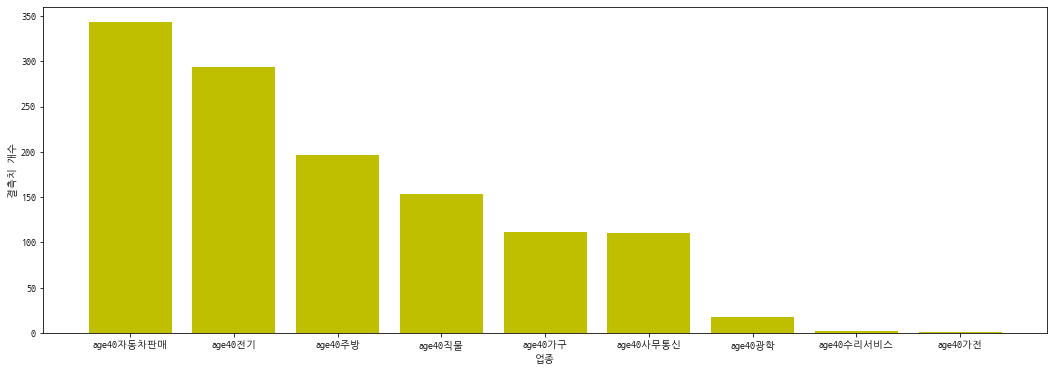

In [7]:
df_null = pd.DataFrame(df_20.isnull().sum()).rename(columns={0:'null'})

df_null.reset_index(inplace=True)

drop_idx = np.where(df_null.null==0)[0]
df_null.drop(drop_idx, inplace=True)

df_null = df_null.sort_values(by='null', ascending=False).set_index('index')

plt.figure(figsize=(18,6))
plt.bar(df_null.index, df_null.null, color='y')
plt.xticks(df_null.index)
plt.ylabel('결측치 개수')
plt.xlabel('업종')

In [7]:
df_20.isnull().sum()

age40숙박         0
age40레저용품       0
age40레저업소       0
age40문화취미       0
age40가구       112
age40전기       294
age40주방       196
age40연료         0
age40광학        18
age40가전         1
age40유통업        0
age40의복         0
age40직물       153
age40신변잡화       0
age40서적문구       0
age40사무통신     110
age40자동차판매    343
age40자동차정비      0
age40의료기관       0
age40보건위생       0
age40요식업소       0
age40음료식품       0
age40수리서비스      2
age40           0
LCLS_10_P       0
LCLS_20_P       0
LCLS_30_P       0
LCLS_40_P       0
LCLS_50_P       0
LCLS_60_P       0
LCLS_70_P       0
LCLS_80_P       0
pm10            0
pm25            0
CONTENT         0
temp            0
humi            0
강수량(mm)         0
dtype: int64

In [8]:
print('age40 null columns : ', ['가구', '전기', '주방', '광학', '가전', '직물', '사무통신', '자동차판매', '수리서비스'])

age40 null columns :  ['가구', '전기', '주방', '광학', '가전', '직물', '사무통신', '자동차판매', '수리서비스']


In [9]:
df_20.drop(['age40가구', 'age40전기', 'age40주방', 
           'age40광학', 'age40가전', 'age40직물', 
           'age40사무통신', 'age40자동차판매', 'age40자동차정비',
           
           'age40수리서비스'], axis=1, inplace=True)

In [10]:
df_20  = df_20.rename(columns={'강수량(mm)':'prec'})

In [11]:
df_20.columns = ['숙박', '레저용품', '레저업소', '문화취미', '연료', '유통업',
       '의복', '신변잡화', '서적문구', '의료기관', '보건위생',
       '요식업소', '음료식품', 'pop', 'LCLS_10_P',
       'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P', 'LCLS_50_P', 'LCLS_60_P',
       'LCLS_70_P', 'LCLS_80_P', 'pm10', 'pm25', 'CONTENT', 'temp', 'humi',
       'prec']

# Two_way Anova (F)

In [12]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [27]:
# good_idx = np.where(df_20.pm10<=50)[0]

# bad_idx = np.where(df_20.pm10>50)[0]

# df_20['pm10_category']=[0]*len(df_20)

In [11]:
# for i in range(len(df_20)):
#     if i in good_idx:
#         df_20['pm10_category'].iloc[i] = 'good'
# #     elif i in middle_idx:
# #         df_20['pm10_category'].iloc[i] = 'middle'
#     else:
#         df_20['pm10_category'].iloc[i] = 'bad'

In [12]:
# good_idx_25 = np.where(df_20.pm25<=25)[0]

# bad_idx_25 = np.where(df_20.pm25>25)[0]

# df_20['pm25_category']=[0]*len(df_20)

In [13]:
# for i in range(len(df_20)):
#     if i in good_idx:
#         df_20['pm25_category'].iloc[i] = 'good'
# #     elif i in middle_idx:
# #         df_20['pm10_category'].iloc[i] = 'middle'
#     else:
#         df_20['pm25_category'].iloc[i] = 'bad'

In [14]:
# good_idx_temp = np.where(df_20.temp<=35)[0]

# bad_idx_temp = np.where(df_20.temp>35)[0]

# df_20['temp_category']=[0]*len(df_20)

In [15]:
# for i in range(len(df_20)):
#     if i in good_idx:
#         df_20['temp_category'].iloc[i] = 'bad'
# #     elif i in middle_idx:
# #         df_20['pm10_category'].iloc[i] = 'middle'
#     else:
#         df_20['temp_category'].iloc[i] = 'good'

In [16]:
# df_anova = df_20[['age20숙박_USE_AMT', 'pm10', 'pm25', 'temp']]

* anova function

In [101]:
formula = '숙박 ~ pm10 + pm25 + temp + humi + prec + pm10:temp + pm10:prec + pm25:temp + pm25:prec'
# :뒤로넣으면 서로 겹치는 변수를 고려해서 반영해주는것.
lm = ols(formula, df_20).fit()

In [102]:
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
pm10,1.0,7.507348e+04,75073.479325,4.968606,0.026437
pm25,1.0,3.745534e+04,37455.337109,2.478915,0.116273
temp,1.0,1.757853e+04,17578.528367,1.163404,0.281493
humi,1.0,1.467224e+04,14672.243167,0.971056,0.325088
prec,1.0,6.108905e+02,610.890518,0.040431,0.840756
pm10:temp,1.0,1.911251e+04,19112.513535,1.264928,0.261480
pm10:prec,1.0,5.420094e+00,5.420094,0.000359,0.984900
pm25:temp,1.0,2.306983e+03,2306.982800,0.152684,0.696218
pm25:prec,1.0,2.999732e+03,2999.732331,0.198532,0.656180
Residual,355.0,5.363896e+06,15109.567143,NaN,NaN


In [13]:
def anova(col_name):
    formula = col_name + ' ~ pm10 + pm25 + temp + humi + CONTENT + prec + CONTENT:temp + CONTENT:prec + CONTENT:humi'
    lm = ols(formula, df_20).fit()
    return lm.summary()

In [33]:
def coef_bar(colname):
    X = df_20.drop(colname, axis=1)
    Y = df_20[colname]
    scaler = StandardScaler()
    
    scaler.fit(X)
    X = scaler.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    ridge = Ridge(fit_intercept=True,
    #               alpha=0.5
                 )
    # solver : svd, 초코피? 는 NE바로안될떄 적용하고, 뒤에 4개는 SGD에 사용
    ridge.fit(X_train,y_train)
    # lasso.fit(X_train, y_train)

    # set_df
    df_sukbak = pd.DataFrame(ridge.coef_, df_20.drop(colname,axis=1).columns).rename(columns={0:'coef'})
    df_sukbak = df_sukbak.sort_values(by='coef', ascending=False)

    # bar
    plt.figure(figsize=(12, 6))
    plt.barh(df_sukbak.index, df_sukbak['coef'])
    # plt.xticks(df_sukbak['coef'])
    return None

# Check Coef

In [16]:
from sklearn.linear_model import Lasso, Ridge

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler

## 숙박 10

In [44]:
anova("숙박")

(                 df         sum_sq       mean_sq          F        PR(>F)
 pm10            1.0    1476.893928   1476.893928   4.236722  4.028791e-02
 pm25            1.0      42.285514     42.285514   0.121303  7.278318e-01
 temp            1.0     373.095741    373.095741   1.070289  3.015844e-01
 humi            1.0     203.924827    203.924827   0.584993  4.448699e-01
 CONTENT         1.0   15011.442507  15011.442507  43.062884  1.879505e-10
 prec            1.0      61.888418     61.888418   0.177537  6.737531e-01
 CONTENT:temp    1.0     580.779835    580.779835   1.666066  1.976263e-01
 CONTENT:prec    1.0      13.244287     13.244287   0.037993  8.455677e-01
 CONTENT:humi    1.0     193.698828    193.698828   0.555658  4.565082e-01
 Residual      355.0  123750.702282    348.593528        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                     숙박   R-s

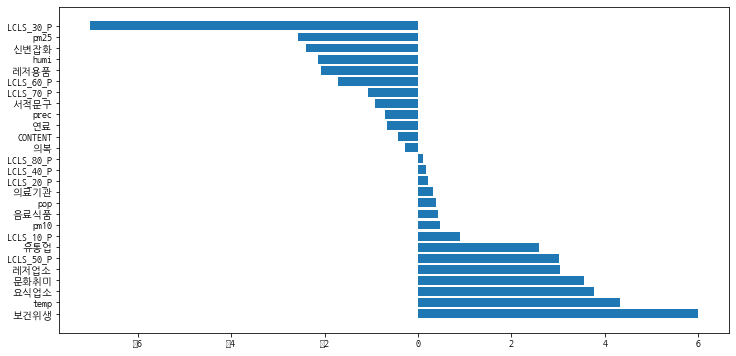

In [34]:
coef_bar('숙박')

## 레저용품 20

In [36]:
anova("레저용품")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   레저용품   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     23.74
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           1.08e-31
Time:                        00:42:26   Log-Likelihood:                -2294.7
No. Observations:                 365   AIC:                             4609.
Df Residuals:                     355   BIC:                             4648.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      394.3644     66.470      5.933      0.000     263.640     525.089
pm10            -0.9573      0.515     -1.858      0.064      -1.971       0.056
pm25             3.4690      0.695      4.988      0.000       2.101       4.837
temp             1.9938      1.747      1.141      0.254      -1.441       5.429
humi            -0.1372      1.448     -0.095      0.925      -2.984       2.710
CONTENT         -0.0539      0.101     -0.531      0.595      -0.253       0.146
prec            -1.3008      1.648     -0.789      0.430      -4.542       1.940
CONTENT:temp    -0.0098      0.003     -2.927      0.004      -0.016      -0.003
CONTENT:prec     0.0015      0.003      0.551      0.582      -0.004       0.007
CONTENT:humi    -0.0027      0.002     -1.154      0.249      -0.007       0.002
==============================================================================
Omnibus:                       18.012   Durbin-Watson:                   1.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.702
Skew:                           0.412   Prob(JB):                     7.13e-06
Kurtosis:                       3.938   Cond. No.                     3.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

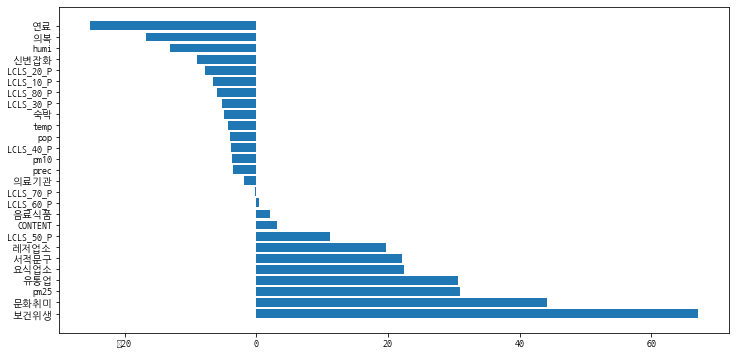

In [35]:
coef_bar('레저용품')

# 레저업소 21

In [20]:
anova('레저업소')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   레저업소   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     25.22
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           2.03e-33
Time:                        00:36:14   Log-Likelihood:                -2473.7
No. Observations:                 365   AIC:                             4967.
Df Residuals:                     355   BIC:                             5006.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1303.2630    108.530     12.008      0.000    1089.820    1516.706
pm10            -1.3774      0.841     -1.637      0.103      -3.032       0.277
pm25             2.8223      1.135      2.486      0.013       0.589       5.055
temp             6.9807      2.852      2.448      0.015       1.372      12.590
humi            -0.7439      2.364     -0.315      0.753      -5.393       3.905
CONTENT         -0.2152      0.166     -1.300      0.194      -0.541       0.110
prec            -3.1800      2.691     -1.182      0.238      -8.472       2.111
CONTENT:temp    -0.0250      0.005     -4.583      0.000      -0.036      -0.014
CONTENT:prec     0.0035      0.005      0.774      0.440      -0.005       0.012
CONTENT:humi    -0.0019      0.004     -0.495      0.621      -0.009       0.006
==============================================================================
Omnibus:                        7.187   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                8.646
Skew:                           0.200   Prob(JB):                       0.0133
Kurtosis:                       3.640   Cond. No.                     3.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

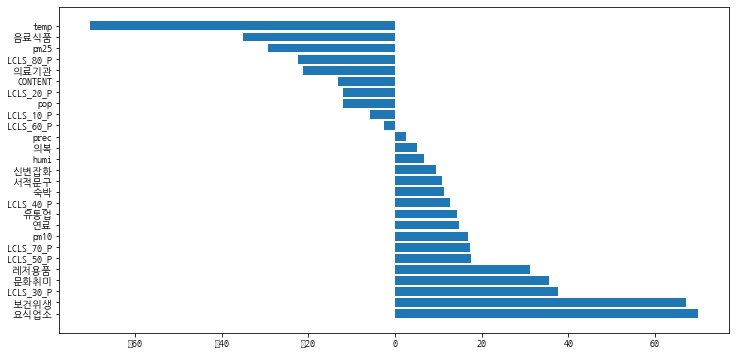

In [37]:
coef_bar('레저업소')

## 문화취미 22

In [48]:
anova("문화취미")

(                 df        sum_sq       mean_sq           F        PR(>F)
 pm10            1.0  2.625125e+04  2.625125e+04    0.305492  5.808076e-01
 pm25            1.0  2.356817e+05  2.356817e+05    2.742684  9.858413e-02
 temp            1.0  7.276048e+04  7.276048e+04    0.846731  3.581036e-01
 humi            1.0  2.154863e+06  2.154863e+06   25.076652  8.698246e-07
 CONTENT         1.0  9.055219e+06  9.055219e+06  105.377721  8.043428e-22
 prec            1.0  5.618231e+03  5.618231e+03    0.065381  7.983333e-01
 CONTENT:temp    1.0  2.208072e+06  2.208072e+06   25.695852  6.446969e-07
 CONTENT:prec    1.0  2.512899e+04  2.512899e+04    0.292432  5.890054e-01
 CONTENT:humi    1.0  6.490271e+04  6.490271e+04    0.755288  3.853943e-01
 Residual      355.0  3.050552e+07  8.593106e+04         NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   문화취미   R-s

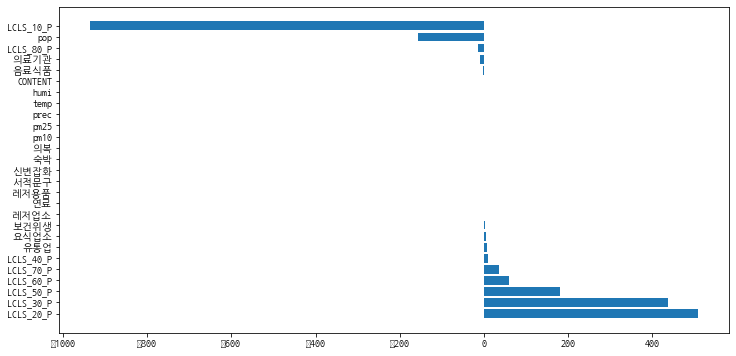

In [24]:
coef_bar('문화취미')

# 가구 30 Null로 삭제

## 전기 31 Null로 삭제

## 주방용구 32 Null로 삭제

# 연료 33

In [38]:
anova('연료')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     연료   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     23.34
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           3.19e-31
Time:                        00:42:58   Log-Likelihood:                -2452.5
No. Observations:                 365   AIC:                             4925.
Df Residuals:                     355   BIC:                             4964.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1925.5587    102.412     18.802      0.000    1724.148    2126.970
pm10            -0.8553      0.794     -1.077      0.282      -2.417       0.706
pm25             0.9383      1.071      0.876      0.382      -1.169       3.046
temp            14.0082      2.691      5.205      0.000       8.716      19.301
humi            -0.7415      2.231     -0.332      0.740      -5.128       3.645
CONTENT         -0.1330      0.156     -0.851      0.395      -0.440       0.174
prec            -5.7674      2.539     -2.272      0.024     -10.761      -0.774
CONTENT:temp    -0.0186      0.005     -3.610      0.000      -0.029      -0.008
CONTENT:prec     0.0038      0.004      0.880      0.379      -0.005       0.012
CONTENT:humi    -0.0013      0.004     -0.352      0.725      -0.008       0.006
==============================================================================
Omnibus:                       17.170   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.408   Prob(JB):                     1.74e-05
Kurtosis:                       3.881   Cond. No.                     3.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

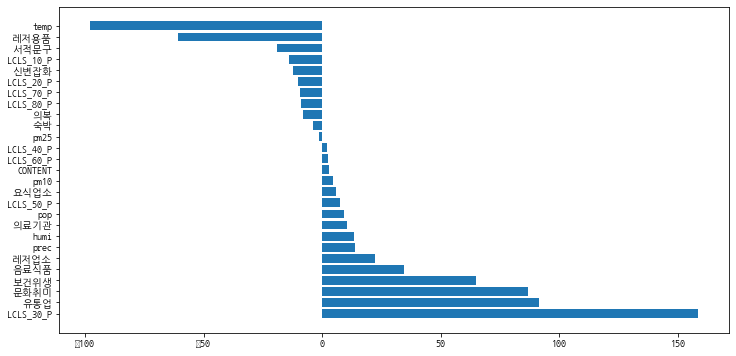

In [39]:
coef_bar('연료')

# 광학제품34 null

# 가전35 null

## 유통업 40

In [50]:
anova("유통업")

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  6.478723e+08  6.478723e+08  45.232822  7.012986e-11
 pm25            1.0  7.282984e+04  7.282984e+04   0.005085  9.431930e-01
 temp            1.0  1.150205e+09  1.150205e+09  80.304403  1.853915e-17
 humi            1.0  3.128521e+08  3.128521e+08  21.842549  4.208964e-06
 CONTENT         1.0  7.814544e+08  7.814544e+08  54.559191  1.086379e-12
 prec            1.0  1.715484e+08  1.715484e+08  11.977080  6.042185e-04
 CONTENT:temp    1.0  3.469551e+07  3.469551e+07   2.422354  1.205061e-01
 CONTENT:prec    1.0  7.141458e+06  7.141458e+06   0.498599  4.805796e-01
 CONTENT:humi    1.0  2.574782e+07  2.574782e+07   1.797648  1.808543e-01
 Residual      355.0  5.084685e+09  1.432306e+07        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    유통업   R-squared:    

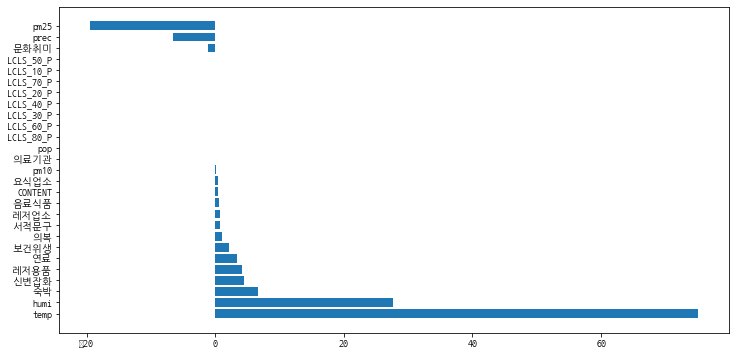

In [51]:
coef_bar('유통업')

## 의복 42

In [52]:
anova('의복')

(                 df        sum_sq        mean_sq         F    PR(>F)
 pm10            1.0  6.615459e+03    6615.459443  0.350917  0.553971
 pm25            1.0  7.914297e+03    7914.297162  0.419814  0.517449
 temp            1.0  1.391070e+05  139107.021430  7.378936  0.006922
 humi            1.0  1.482724e+05  148272.390052  7.865114  0.005317
 CONTENT         1.0  1.292513e+04   12925.125833  0.685614  0.408217
 prec            1.0  1.458580e+05  145857.967307  7.737040  0.005699
 CONTENT:temp    1.0  1.226403e+05  122640.281342  6.505458  0.011174
 CONTENT:prec    1.0  1.714261e+01      17.142615  0.000909  0.975960
 CONTENT:humi    1.0  9.613580e+04   96135.801702  5.099527  0.024539
 Residual      355.0  6.692427e+06   18851.906936       NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                     의복   R-squared:                       0.092
 Model:            

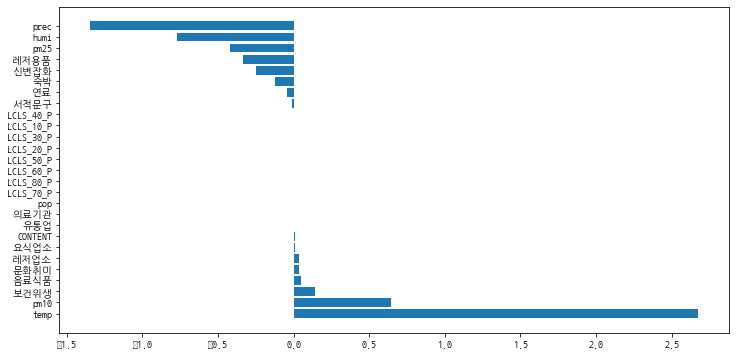

In [53]:
coef_bar('의복')

## 직물 43 Null로 삭제

## 신변잡화 44

In [54]:
anova('신변잡화')

(                 df         sum_sq       mean_sq          F        PR(>F)
 pm10            1.0   16570.125614  16570.125614   8.077991  4.739544e-03
 pm25            1.0      79.488215     79.488215   0.038751  8.440559e-01
 temp            1.0    2253.672818   2253.672818   1.098673  2.952706e-01
 humi            1.0   70185.297762  70185.297762  34.215564  1.120616e-08
 CONTENT         1.0   94841.723077  94841.723077  46.235652  4.456180e-11
 prec            1.0   15476.329299  15476.329299   7.544761  6.325287e-03
 CONTENT:temp    1.0      25.580037     25.580037   0.012470  9.111476e-01
 CONTENT:prec    1.0     190.391015    190.391015   0.092816  7.608055e-01
 CONTENT:humi    1.0     779.480854    779.480854   0.379999  5.379986e-01
 Residual      355.0  728200.212679   2051.268205        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   신변잡화   R-s

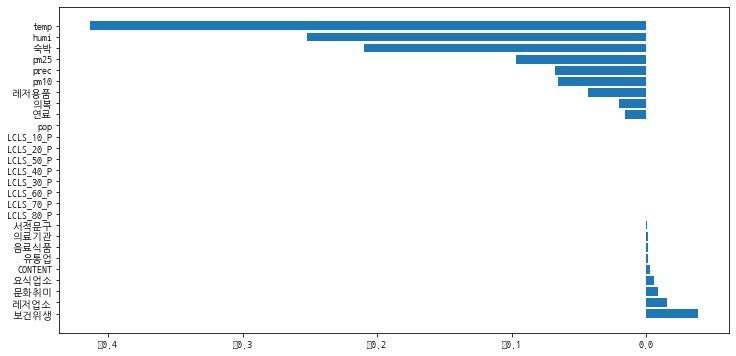

In [55]:
coef_bar('신변잡화')

## 서적문구 50

In [56]:
anova('서적문구')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  1.185758e+07  1.185758e+07  37.342626  2.607795e-09
 pm25            1.0  1.674166e+06  1.674166e+06   5.272389  2.224829e-02
 temp            1.0  6.117023e+06  6.117023e+06  19.264111  1.503333e-05
 humi            1.0  1.366811e+06  1.366811e+06   4.304445  3.873293e-02
 CONTENT         1.0  2.146817e+06  2.146817e+06   6.760890  9.706921e-03
 prec            1.0  3.332671e+03  3.332671e+03   0.010495  9.184595e-01
 CONTENT:temp    1.0  1.252352e+05  1.252352e+05   0.394398  5.304002e-01
 CONTENT:prec    1.0  1.630505e+05  1.630505e+05   0.513489  4.741037e-01
 CONTENT:humi    1.0  4.403473e+03  4.403473e+03   0.013868  9.063235e-01
 Residual      355.0  1.127248e+08  3.175347e+05        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   서적문구   R-squared:    

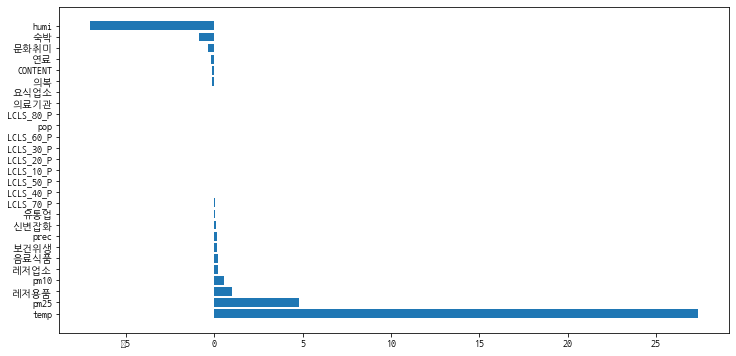

In [57]:
coef_bar('서적문구')

# 사무통신52 Null

## 자동차판매 60 Null로 삭제

## 자동차정비 62 Null로 삭제

## 의료기관 70

In [58]:
anova('의료기관')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  4.726050e+06  4.726050e+06   0.610706  4.350428e-01
 pm25            1.0  3.966280e+06  3.966280e+06   0.512528  4.745173e-01
 temp            1.0  3.010531e+07  3.010531e+07   3.890247  4.934301e-02
 humi            1.0  5.003170e+06  5.003170e+06   0.646516  4.218991e-01
 CONTENT         1.0  3.333361e+08  3.333361e+08  43.074119  1.869905e-10
 prec            1.0  7.759131e+06  7.759131e+06   1.002645  3.173534e-01
 CONTENT:temp    1.0  5.132659e+07  5.132659e+07   6.632488  1.041759e-02
 CONTENT:prec    1.0  2.296312e+06  2.296312e+06   0.296732  5.862802e-01
 CONTENT:humi    1.0  3.930122e+06  3.930122e+06   0.507855  4.765368e-01
 Residual      355.0  2.747225e+09  7.738663e+06        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   의료기관   R-squared:    

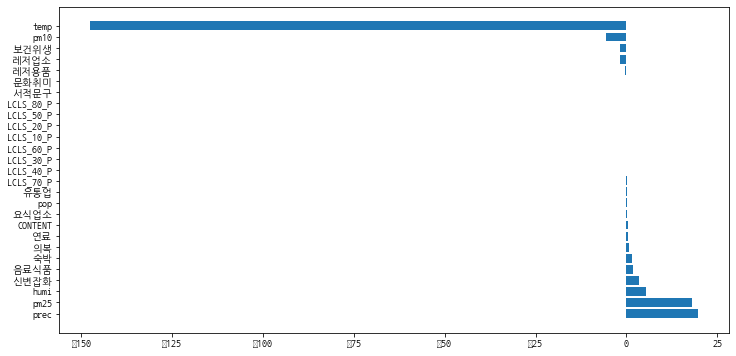

In [59]:
coef_bar('의료기관')

## 보건위생 71

In [60]:
anova('보건위생')

(                 df        sum_sq       mean_sq           F        PR(>F)
 pm10            1.0  2.177904e+04  2.177904e+04    0.107108  7.436543e-01
 pm25            1.0  8.321981e+05  8.321981e+05    4.092684  4.381828e-02
 temp            1.0  6.042879e+05  6.042879e+05    2.971840  8.559602e-02
 humi            1.0  2.926213e+06  2.926213e+06   14.390886  1.745403e-04
 CONTENT         1.0  2.474373e+07  2.474373e+07  121.687695  1.579582e-24
 prec            1.0  7.593531e+05  7.593531e+05    3.734439  5.409682e-02
 CONTENT:temp    1.0  7.463713e+05  7.463713e+05    3.670595  5.618335e-02
 CONTENT:prec    1.0  6.613501e+04  6.613501e+04    0.325247  5.688322e-01
 CONTENT:humi    1.0  1.147691e+06  1.147691e+06    5.644253  1.804287e-02
 Residual      355.0  7.218498e+07  2.033380e+05         NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   보건위생   R-s

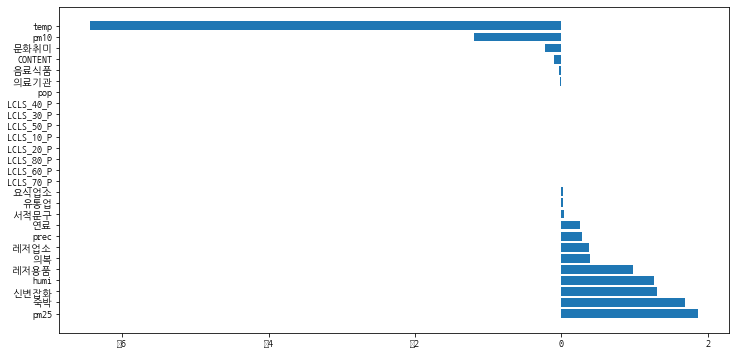

In [61]:
coef_bar('보건위생')

## 요식업소 80

In [62]:
anova('요식업소')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  9.340936e+07  9.340936e+07  14.286999  1.840451e-04
 pm25            1.0  1.581238e+05  1.581238e+05   0.024185  8.765032e-01
 temp            1.0  1.644360e+08  1.644360e+08  25.150553  8.392482e-07
 humi            1.0  1.452449e+08  1.452449e+08  22.215263  3.505787e-06
 CONTENT         1.0  4.897369e+08  4.897369e+08  74.905452  1.746613e-16
 prec            1.0  8.578760e+07  8.578760e+07  13.121248  3.345178e-04
 CONTENT:temp    1.0  8.394602e+07  8.394602e+07  12.839577  3.867514e-04
 CONTENT:prec    1.0  2.498906e+04  2.498906e+04   0.003822  9.507386e-01
 CONTENT:humi    1.0  1.756698e+07  1.756698e+07   2.686876  1.020639e-01
 Residual      355.0  2.321014e+09  6.538067e+06        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   요식업소   R-squared:    

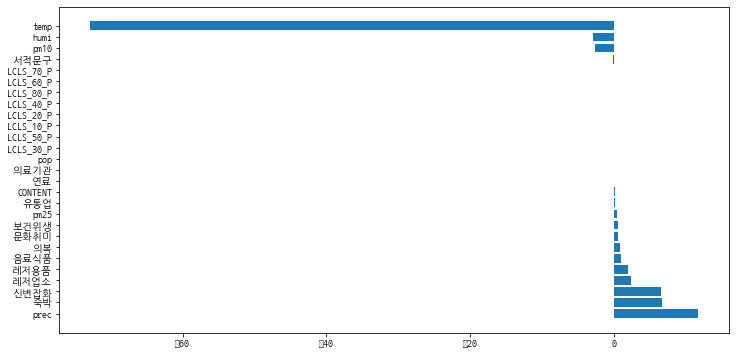

In [63]:
coef_bar('요식업소')

## 음료식품 81

In [64]:
anova('음료식품')

(                 df        sum_sq       mean_sq         F    PR(>F)
 pm10            1.0  6.528213e+05  6.528213e+05  2.485983  0.115755
 pm25            1.0  1.597657e+05  1.597657e+05  0.608397  0.435912
 temp            1.0  3.233113e+05  3.233113e+05  1.231189  0.267927
 humi            1.0  2.728406e+02  2.728406e+02  0.001039  0.974304
 CONTENT         1.0  2.525944e+06  2.525944e+06  9.618950  0.002080
 prec            1.0  1.632391e+06  1.632391e+06  6.216246  0.013113
 CONTENT:temp    1.0  1.402232e+06  1.402232e+06  5.339787  0.021417
 CONTENT:prec    1.0  2.545024e+05  2.545024e+05  0.969161  0.325560
 CONTENT:humi    1.0  3.018705e+05  3.018705e+05  1.149541  0.284374
 Residual      355.0  9.322330e+07  2.626008e+05       NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   음료식품   R-squared:                       0.072
 Model:                       

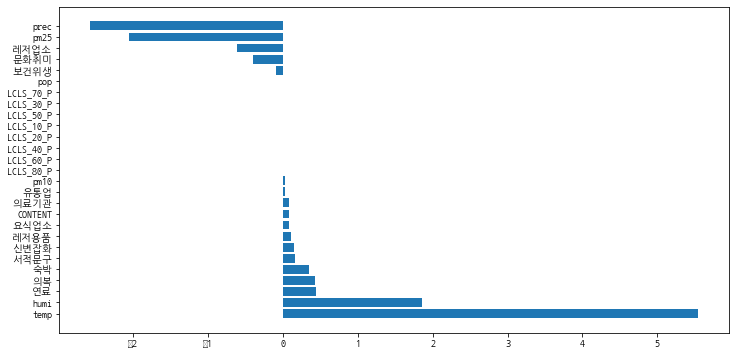

In [65]:
coef_bar('음료식품')

## 수리서비스 92 NUll 40

In [66]:
# anova('수리서비스')

In [39]:
# coef_bar('수리서비스')

* age40
* 숙박(10) - temp pm10
* 레저용품(10 25) - pm25 문화취미 보건위생
* 유통업(10) - temp humi 
* 신변잡화(10) - 보건위생 레저업소
* 요식업소(10) - prec 숙박 신변잡화

In [67]:
anova('LCLS_10_P')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  7.635486e+12  7.635486e+12  27.060065  3.340985e-07
 pm25            1.0  5.556909e+11  5.556909e+11   1.969361  1.613897e-01
 temp            1.0  2.926500e+12  2.926500e+12  10.371479  1.397942e-03
 humi            1.0  3.378672e+11  3.378672e+11   1.197397  2.745845e-01
 CONTENT         1.0  2.471916e+12  2.471916e+12   8.760439  3.285119e-03
 prec            1.0  2.447860e+12  2.447860e+12   8.675182  3.438482e-03
 CONTENT:temp    1.0  3.264340e+12  3.264340e+12  11.568777  7.470851e-04
 CONTENT:prec    1.0  7.407664e+08  7.407664e+08   0.002625  9.591652e-01
 CONTENT:humi    1.0  3.376241e+06  3.376241e+06   0.000012  9.972420e-01
 Residual      355.0  1.001697e+14  2.821681e+11        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_10_P   R-squared:    

In [68]:
anova('LCLS_10_P')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  7.635486e+12  7.635486e+12  27.060065  3.340985e-07
 pm25            1.0  5.556909e+11  5.556909e+11   1.969361  1.613897e-01
 temp            1.0  2.926500e+12  2.926500e+12  10.371479  1.397942e-03
 humi            1.0  3.378672e+11  3.378672e+11   1.197397  2.745845e-01
 CONTENT         1.0  2.471916e+12  2.471916e+12   8.760439  3.285119e-03
 prec            1.0  2.447860e+12  2.447860e+12   8.675182  3.438482e-03
 CONTENT:temp    1.0  3.264340e+12  3.264340e+12  11.568777  7.470851e-04
 CONTENT:prec    1.0  7.407664e+08  7.407664e+08   0.002625  9.591652e-01
 CONTENT:humi    1.0  3.376241e+06  3.376241e+06   0.000012  9.972420e-01
 Residual      355.0  1.001697e+14  2.821681e+11        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_10_P   R-squared:    

In [69]:
anova('LCLS_20_P')

(                 df        sum_sq       mean_sq         F    PR(>F)
 pm10            1.0  1.045265e+13  1.045265e+13  9.037741  0.002833
 pm25            1.0  1.403743e+12  1.403743e+12  1.213728  0.271341
 temp            1.0  2.422868e+12  2.422868e+12  2.094900  0.148674
 humi            1.0  3.050764e+12  3.050764e+12  2.637802  0.105235
 CONTENT         1.0  7.059592e+12  7.059592e+12  6.103982  0.013957
 prec            1.0  1.951432e+11  1.951432e+11  0.168728  0.681493
 CONTENT:temp    1.0  2.970333e+12  2.970333e+12  2.568259  0.109917
 CONTENT:prec    1.0  3.545182e+09  3.545182e+09  0.003065  0.955879
 CONTENT:humi    1.0  5.143452e+12  5.143452e+12  4.447217  0.035658
 Residual      355.0  4.105771e+14  1.156555e+12       NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_20_P   R-squared:                       0.074
 Model:                       

In [70]:
anova('LCLS_30_P')

(                 df        sum_sq       mean_sq            F         PR(>F)
 pm10            1.0  7.334144e+13  7.334144e+13   373.780950   2.113125e-57
 pm25            1.0  3.562697e+12  3.562697e+12    18.157104   2.609216e-05
 temp            1.0  3.559249e+14  3.559249e+14  1813.953529  1.400258e-141
 humi            1.0  5.271573e+13  5.271573e+13   268.663077   2.342610e-45
 CONTENT         1.0  2.836461e+13  2.836461e+13   144.558816   3.624593e-28
 prec            1.0  2.141294e+13  2.141294e+13   109.129993   1.879290e-22
 CONTENT:temp    1.0  4.137616e+12  4.137616e+12    21.087154   6.102068e-06
 CONTENT:prec    1.0  5.782013e+11  5.782013e+11     2.946774   8.692147e-02
 CONTENT:humi    1.0  1.497782e+11  1.497782e+11     0.763337   3.828768e-01
 Residual      355.0  6.965633e+13  1.962150e+11          NaN            NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       

In [71]:
anova('LCLS_40_P')

(                 df        sum_sq       mean_sq         F    PR(>F)
 pm10            1.0  7.032760e+09  7.032760e+09  0.913819  0.339754
 pm25            1.0  9.514702e+08  9.514702e+08  0.123632  0.725337
 temp            1.0  1.388821e+09  1.388821e+09  0.180460  0.671236
 humi            1.0  1.678508e+10  1.678508e+10  2.181011  0.140609
 CONTENT         1.0  2.753759e+10  2.753759e+10  3.578165  0.059358
 prec            1.0  5.552934e+09  5.552934e+09  0.721534  0.396214
 CONTENT:temp    1.0  4.565140e+09  4.565140e+09  0.593183  0.441703
 CONTENT:prec    1.0  5.491100e+08  5.491100e+08  0.071350  0.789536
 CONTENT:humi    1.0  5.835845e+09  5.835845e+09  0.758295  0.384451
 Residual      355.0  2.732083e+12  7.696009e+09       NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_40_P   R-squared:                       0.025
 Model:                       

In [72]:
anova('LCLS_50_P')

(                 df        sum_sq       mean_sq           F        PR(>F)
 pm10            1.0  2.862858e+10  2.862858e+10    0.697445  4.042051e-01
 pm25            1.0  9.656730e+10  9.656730e+10    2.352559  1.259682e-01
 temp            1.0  8.312111e+08  8.312111e+08    0.020250  8.869222e-01
 humi            1.0  4.465780e+12  4.465780e+12  108.794701  2.138958e-22
 CONTENT         1.0  1.143793e+12  1.143793e+12   27.864914  2.270598e-07
 prec            1.0  1.331059e+12  1.331059e+12   32.427068  2.597446e-08
 CONTENT:temp    1.0  7.635898e+10  7.635898e+10    1.860247  1.734605e-01
 CONTENT:prec    1.0  3.283721e+10  3.283721e+10    0.799976  3.717067e-01
 CONTENT:humi    1.0  2.485197e+10  2.485197e+10    0.605440  4.370282e-01
 Residual      355.0  1.457196e+13  4.104777e+10         NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_50_P   R-s

In [73]:
anova('LCLS_60_P')

(                 df        sum_sq       mean_sq         F    PR(>F)
 pm10            1.0  2.759580e+10  2.759580e+10  4.094666  0.043768
 pm25            1.0  1.569013e+07  1.569013e+07  0.002328  0.961544
 temp            1.0  6.985734e+08  6.985734e+08  0.103654  0.747677
 humi            1.0  5.028553e+09  5.028553e+09  0.746137  0.388285
 CONTENT         1.0  3.745475e+08  3.745475e+08  0.055575  0.813767
 prec            1.0  1.866922e+09  1.866922e+09  0.277014  0.598994
 CONTENT:temp    1.0  8.760469e+09  8.760469e+09  1.299879  0.255004
 CONTENT:prec    1.0  4.430481e+09  4.430481e+09  0.657395  0.418024
 CONTENT:humi    1.0  3.046271e+09  3.046271e+09  0.452006  0.501821
 Residual      355.0  2.392505e+12  6.739450e+09       NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_60_P   R-squared:                       0.021
 Model:                       

In [74]:
anova('LCLS_70_P')

(                 df        sum_sq       mean_sq          F    PR(>F)
 pm10            1.0  2.602662e+09  2.602662e+09   4.227623  0.040502
 pm25            1.0  1.936107e+08  1.936107e+08   0.314491  0.575291
 temp            1.0  7.304239e+09  7.304239e+09  11.864611  0.000641
 humi            1.0  1.108819e+10  1.108819e+10  18.011052  0.000028
 CONTENT         1.0  1.462165e+10  1.462165e+10  23.750611  0.000002
 prec            1.0  2.133437e+09  2.133437e+09   3.465440  0.063490
 CONTENT:temp    1.0  1.067619e+08  1.067619e+08   0.173418  0.677343
 CONTENT:prec    1.0  1.497045e+08  1.497045e+08   0.243172  0.622229
 CONTENT:humi    1.0  2.543220e+08  2.543220e+08   0.413107  0.520812
 Residual      355.0  2.185495e+11  6.156324e+08        NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_70_P   R-squared:                       0.150
 Model:            

In [75]:
anova('LCLS_80_P')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  1.998761e+10  1.998761e+10  25.824850  6.057544e-07
 pm25            1.0  3.130564e+09  3.130564e+09   4.044822  4.506255e-02
 temp            1.0  6.027771e+10  6.027771e+10  77.881371  5.054311e-17
 humi            1.0  2.183384e+10  2.183384e+10  28.210252  1.924527e-07
 CONTENT         1.0  8.470094e+09  8.470094e+09  10.943723  1.035328e-03
 prec            1.0  6.575042e+09  6.575042e+09   8.495235  3.786658e-03
 CONTENT:temp    1.0  1.760845e+08  1.760845e+08   0.227509  6.336707e-01
 CONTENT:prec    1.0  2.294745e+07  2.294745e+07   0.029649  8.633870e-01
 CONTENT:humi    1.0  1.670700e+08  1.670700e+08   0.215862  6.424963e-01
 Residual      355.0  2.747587e+11  7.739682e+08        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_80_P   R-squared:    